In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/code/data/train/subtask_1/en/')
#os.chdir('/content/drive/My Drive/Colab Notebooks/code/data/test/subtask_1/en/')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Read bloom1b7.csv
df_bloom1b7 = pd.read_csv("bloom1b7.csv")
df_bloom1b7['text_length'] = df_bloom1b7['text'].apply(len)
mean_text_length_bloom1b7 = df_bloom1b7['text_length'].mean()
print("Mean text length for bloom1b7.csv:", mean_text_length_bloom1b7)

# Read bloom3b.csv
df_bloom3b = pd.read_csv("bloom3b.csv")
df_bloom3b['text_length'] = df_bloom3b['text'].apply(len)
mean_text_length_bloom3b = df_bloom3b['text_length'].mean()
print("Mean text length for bloom3b.csv:", mean_text_length_bloom3b)

# Read gpt.csv
df_gpt = pd.read_csv("gpt.csv")
df_gpt['text_length'] = df_gpt['text'].apply(len)
mean_text_length_gpt = df_gpt['text_length'].mean()
print("Mean text length for gpt.csv:", mean_text_length_gpt)

# Read human.csv
df_human = pd.read_csv("human.csv")
df_human['text_length'] = df_human['text'].apply(len)
mean_text_length_human = df_human['text_length'].mean()
print("Mean text length for human.csv:", mean_text_length_human)


Mean text length for bloom1b7.csv: 336.243
Mean text length for bloom3b.csv: 335.72
Mean text length for gpt.csv: 292.251
Mean text length for human.csv: 292.397


# BLOOM-1B7

In [4]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

file1 = "classification_results_1b7_1b7.csv"
file2 = "classification_results_1b7_human.csv"
file3 = "classification_results_1b7_3b.csv"
file4 = "classification_results_1b7_gpt.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)

# Combine results into one DataFrame
df_1b7 = pd.concat([df1, df2, df3, df4], ignore_index=True)

df_1b7 = df_1b7[(df_1b7['predicted_label'] == 'generated') | (df_1b7['predicted_label'] == 'human')]
df_1b7 = df_1b7.dropna(subset=['predicted_label'])


## Text length 1b7 on all data

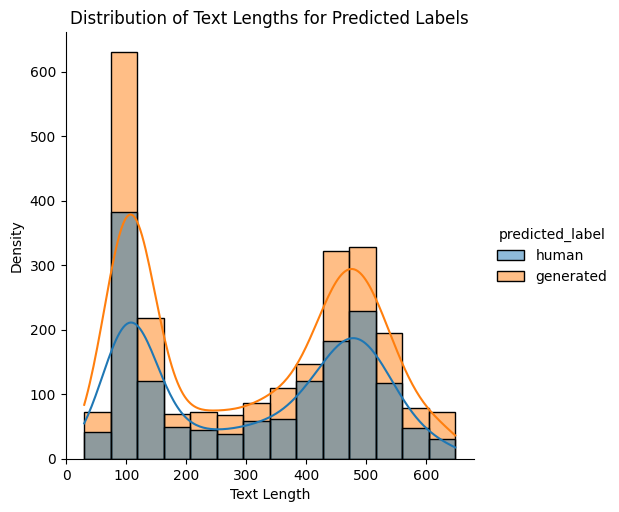

Accuracy for Different Text Length Ranges with 1B Bloom:
-----------------------------------------------------
Text Length Range 0-100: Accuracy = 50.66%
Text Length Range 101-500: Accuracy = 55.14%
Text Length Range 500+: Accuracy = 61.10%


In [6]:
# Add a new column fot text length
df_1b7['text_length'] = df_1b7['text'].apply(len)

# Plot the distribution of text lengths for each label (human/generated)
sns.displot(data=df_1b7, x='text_length', hue='predicted_label', kde=True)
plt.title('Distribution of Text Lengths for Predicted Labels')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# ranges
short_range = (0, 100)
medium_range = (101, 500)
long_range = (500, float('inf'))

# Calculate accuracy for texts in the short range (0-100 characters)
short_texts = df_1b7[(df_1b7['text_length'] >= short_range[0]) & (df_1b7['text_length'] <= short_range[1])]
short_accuracy = (short_texts['label'] == short_texts['predicted_label']).mean()

# Calculate accuracy for texts in the medium range (101-400 characters)
medium_texts = df_1b7[(df_1b7['text_length'] >= medium_range[0]) & (df_1b7['text_length'] <= medium_range[1])]
medium_accuracy = (medium_texts['label'] == medium_texts['predicted_label']).mean()

# Calculate accuracy for texts in the long range (401+ characters)
long_texts = df_1b7[df_1b7['text_length'] >= long_range[0]]
long_accuracy = (long_texts['label'] == long_texts['predicted_label']).mean()

print("Accuracy for Different Text Length Ranges with 1B Bloom:")
print("-----------------------------------------------------")
print(f"Text Length Range 0-100: Accuracy = {short_accuracy:.2%}")
print(f"Text Length Range 101-500: Accuracy = {medium_accuracy:.2%}")
print(f"Text Length Range 500+: Accuracy = {long_accuracy:.2%}")

## Text length 1b7 on 1b7 data

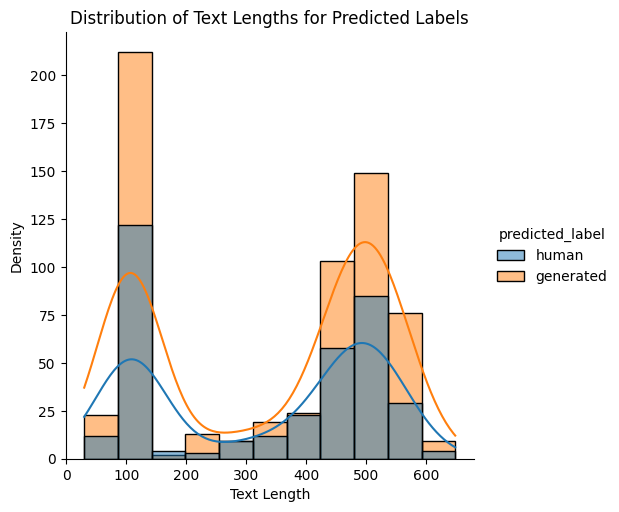

Accuracy for Different Text Length Ranges with df_1b:
-----------------------------------------------------
Text Length Range 0-100: Accuracy = 67.65%
Text Length Range 101-500: Accuracy = 62.34%
Text Length Range 501+: Accuracy = 66.28%


In [7]:
df3 = pd.read_csv("classification_results_1b7_1b7.csv")

df3['text_length'] = df3['text'].apply(len)

# Plot the distribution of text lengths for each label (human/generated)
sns.displot(data=df3, x='text_length', hue='predicted_label', kde=True)
plt.title('Distribution of Text Lengths for Predicted Labels')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# ranges
short_range = (0, 100)
medium_range = (101, 500)
long_range = (501, float('inf'))

# Calculate accuracy for texts in the short range (0-100 characters)
short_texts = df3[(df3['text_length'] >= short_range[0]) & (df3['text_length'] <= short_range[1])]
short_accuracy = (short_texts['label'] == short_texts['predicted_label']).mean()

# Calculate accuracy for texts in the medium range (101-400 characters)
medium_texts = df3[(df3['text_length'] >= medium_range[0]) & (df3['text_length'] <= medium_range[1])]
medium_accuracy = (medium_texts['label'] == medium_texts['predicted_label']).mean()

# Calculate accuracy for texts in the long range (401+ characters)
long_texts = df3[df3['text_length'] >= long_range[0]]
long_accuracy = (long_texts['label'] == long_texts['predicted_label']).mean()

print("Accuracy for Different Text Length Ranges with df_1b:")
print("-----------------------------------------------------")
print(f"Text Length Range 0-100: Accuracy = {short_accuracy:.2%}")
print(f"Text Length Range 101-500: Accuracy = {medium_accuracy:.2%}")
print(f"Text Length Range 501+: Accuracy = {long_accuracy:.2%}")

## 1B7 text length accross domains

In [8]:
# Calculate accuracy and average text length for 'tweets' domain
tweets_df = df_1b7[df_1b7['domain'] == 'tweets']
tweets_accuracy = (tweets_df['label'] == tweets_df['predicted_label']).mean()
tweets_avg_length = tweets_df['text_length'].mean()

# Calculate accuracy and average text length for 'legal' domain
legal_df = df_1b7[df_1b7['domain'] == 'legal']
legal_accuracy = (legal_df['label'] == legal_df['predicted_label']).mean()
legal_avg_length = legal_df['text_length'].mean()

# Calculate accuracy and average text length for 'wiki' domain
wiki_df = df_1b7[df_1b7['domain'] == 'wiki']
wiki_accuracy = (wiki_df['label'] == wiki_df['predicted_label']).mean()
wiki_avg_length = wiki_df['text_length'].mean()

print("Accuracy and Average Text Length for Different Domains:")
print(f"Tweets: Accuracy={tweets_accuracy:.2%}, Average Length={tweets_avg_length:.2f}")
print(f"Legal: Accuracy={legal_accuracy:.2%}, Average Length={legal_avg_length:.2f}")
print(f"Wiki: Accuracy={wiki_accuracy:.2%}, Average Length={wiki_avg_length:.2f}")

Accuracy and Average Text Length for Different Domains:
Tweets: Accuracy=56.34%, Average Length=108.10
Legal: Accuracy=54.86%, Average Length=417.28
Wiki: Accuracy=55.65%, Average Length=431.63


# BLOOM-3B

In [9]:
file1 = "classification_results_3b_1b7.csv"
file2 = "classification_results_3b_human.csv"
file3 = "classification_results_3b_3b.csv"
file4 = "classification_results_3b_gpt.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)

# Combine results into one DataFrame
df_3b = pd.concat([df1, df2, df3, df4], ignore_index=True)

df_3b = df_3b[(df_3b['predicted_label'] == 'generated') | (df_3b['predicted_label'] == 'human')]
df_3b = df_3b.dropna(subset=['predicted_label'])


## Text lentgh 3b on all data

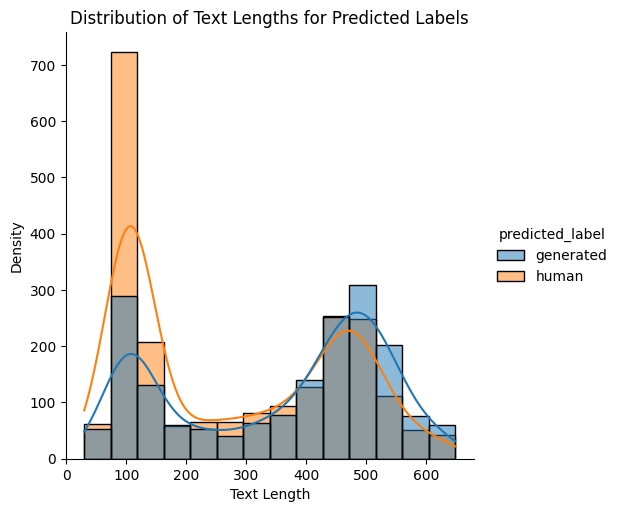

Accuracy for Different Text Length Ranges with df_3b:
-----------------------------------------------------
Text Length Range 0-100: Accuracy = 53.40%
Text Length Range 101-500: Accuracy = 45.47%
Text Length Range 501+: Accuracy = 59.97%


In [10]:
# Add a new column for text length
df_3b['text_length'] = df_3b['text'].apply(len)

# Plot the distribution of text lengths for each label (human/generated)
sns.displot(data=df_3b, x='text_length', hue='predicted_label', kde=True)
plt.title('Distribution of Text Lengths for Predicted Labels')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# ranges
short_range = (0, 100)
medium_range = (101, 500)
long_range = (501, float('inf'))

# Calculate accuracy for texts in the short range (0-100 characters)
short_texts = df_3b[(df_3b['text_length'] >= short_range[0]) & (df_3b['text_length'] <= short_range[1])]
short_accuracy = (short_texts['label'] == short_texts['predicted_label']).mean()

# Calculate accuracy for texts in the medium range (101-400 characters)
medium_texts = df_3b[(df_3b['text_length'] >= medium_range[0]) & (df_3b['text_length'] <= medium_range[1])]
medium_accuracy = (medium_texts['label'] == medium_texts['predicted_label']).mean()

# Calculate accuracy for texts in the long range (401+ characters)
long_texts = df_3b[df_3b['text_length'] >= long_range[0]]
long_accuracy = (long_texts['label'] == long_texts['predicted_label']).mean()

print("Accuracy for Different Text Length Ranges with df_3b:")
print("-----------------------------------------------------")
print(f"Text Length Range 0-100: Accuracy = {short_accuracy:.2%}")
print(f"Text Length Range 101-500: Accuracy = {medium_accuracy:.2%}")
print(f"Text Length Range 501+: Accuracy = {long_accuracy:.2%}")

## Text length 3b 3b

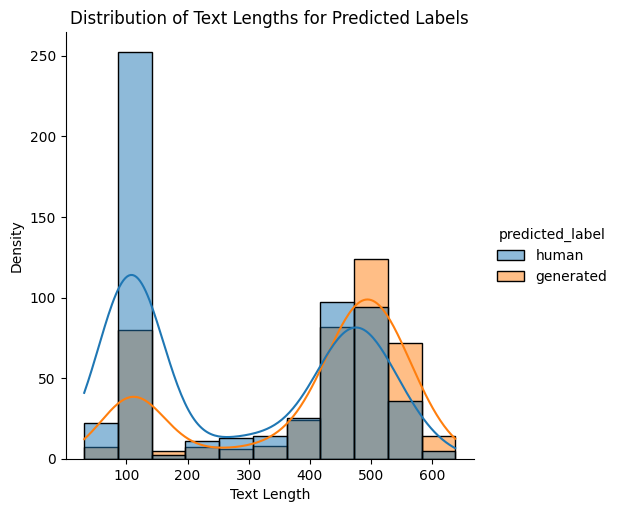

Accuracy for Different Text Length Ranges with df_3b:
-----------------------------------------------------
Text Length Range 0-100: Accuracy = 23.60%
Text Length Range 101-500: Accuracy = 38.45%
Text Length Range 501+: Accuracy = 65.42%


In [11]:
df3 = pd.read_csv("classification_results_3b_3b.csv")

df3['text_length'] = df3['text'].apply(len)

# Plot the distribution of text lengths for each label (human/generated)
sns.displot(data=df3, x='text_length', hue='predicted_label', kde=True)
plt.title('Distribution of Text Lengths for Predicted Labels')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# ranges
short_range = (0, 100)
medium_range = (101, 500)
long_range = (501, float('inf'))

# Calculate accuracy for texts in the short range (0-100 characters)
short_texts = df3[(df3['text_length'] >= short_range[0]) & (df3['text_length'] <= short_range[1])]
short_accuracy = (short_texts['label'] == short_texts['predicted_label']).mean()

# Calculate accuracy for texts in the medium range (101-400 characters)
medium_texts = df3[(df3['text_length'] >= medium_range[0]) & (df3['text_length'] <= medium_range[1])]
medium_accuracy = (medium_texts['label'] == medium_texts['predicted_label']).mean()

# Calculate accuracy for texts in the long range (401+ characters)
long_texts = df3[df3['text_length'] >= long_range[0]]
long_accuracy = (long_texts['label'] == long_texts['predicted_label']).mean()

print("Accuracy for Different Text Length Ranges with df_3b:")
print("-----------------------------------------------------")
print(f"Text Length Range 0-100: Accuracy = {short_accuracy:.2%}")
print(f"Text Length Range 101-500: Accuracy = {medium_accuracy:.2%}")
print(f"Text Length Range 501+: Accuracy = {long_accuracy:.2%}")

## Text length domains

In [ ]:
# Calculate accuracy and average text length for 'tweets' domain
tweets_df = df_3b[df_3b['domain'] == 'tweets']
tweets_accuracy = (tweets_df['label'] == tweets_df['predicted_label']).mean()
tweets_avg_length = tweets_df['text_length'].mean()

# Calculate accuracy and average text length for 'legal' domain
legal_df = df_3b[df_3b['domain'] == 'legal']
legal_accuracy = (legal_df['label'] == legal_df['predicted_label']).mean()
legal_avg_length = legal_df['text_length'].mean()

# Calculate accuracy and average text length for 'wiki' domain
wiki_df = df_3b[df_3b['domain'] == 'wiki']
wiki_accuracy = (wiki_df['label'] == wiki_df['predicted_label']).mean()
wiki_avg_length = wiki_df['text_length'].mean()

print("Accuracy and Average Text Length for Different Domains:")
print(f"Tweets: Accuracy={tweets_accuracy:.2%}, Average Length={tweets_avg_length:.2f}")
print(f"Legal: Accuracy={legal_accuracy:.2%}, Average Length={legal_avg_length:.2f}")
print(f"Wiki: Accuracy={wiki_accuracy:.2%}, Average Length={wiki_avg_length:.2f}")


Accuracy and Average Text Length for Different Domains:
Tweets: Accuracy=45.16%, Average Length=108.09
Legal: Accuracy=52.25%, Average Length=417.28
Wiki: Accuracy=50.19%, Average Length=431.56


# GPT-3.5-Turbo


In [12]:
def clean_generated_text(generated_text):
    if 'human' in generated_text.lower():
        return 'human'
    elif 'machine' in generated_text.lower():
        return 'generated'
    #elif 'generated' in generated_text.lower():
    #    return 'machine'
    elif 'AI' in generated_text:
        return 'generated'
    elif 'large language model' in generated_text.lower():
        return 'generated'
    else:
        return None

In [13]:

file1 = "classification_results_gpt_1b7.csv"
file2 = "classification_results_gpt_3b.csv"
file3 = "classification_results_gpt_gpt.csv"
file4 = "classification_results_gpt_human.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)

# Combine results into one DataFrame
df_gpt = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Rename columns to match requirements
df_gpt.rename(columns={'generated_label': 'predicted_label'}, inplace=True)

# Assuming you have a function clean_generated_text defined
df_gpt['predicted_label'] = df_gpt['predicted_label'].apply(clean_generated_text)


# Confustion matrix GPT with GPt texts only

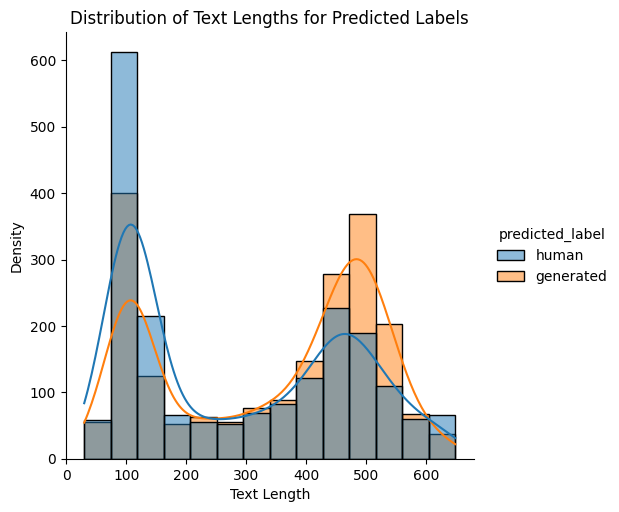

Accuracy for Different Text Length Ranges with df_gpt:
-----------------------------------------------------
Text Length Range 0-100: Accuracy = 58.11%
Text Length Range 101-500: Accuracy = 50.89%
Text Length Range 501+: Accuracy = 57.28%


In [14]:
# Add a new column indicating the length of each text
df_gpt['text_length'] = df_gpt['text'].apply(len)

# Plot the distribution of text lengths for each label
sns.displot(data=df_gpt, x='text_length', hue='predicted_label', kde=True)
plt.title('Distribution of Text Lengths for Predicted Labels')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# ranges
short_range = (0, 100)
medium_range = (101, 500)
long_range = (501, float('inf'))

# Calculate accuracy for texts in the short range (0-100 characters)
short_texts = df_gpt[(df_gpt['text_length'] >= short_range[0]) & (df_gpt['text_length'] <= short_range[1])]
short_accuracy = (short_texts['label'] == short_texts['predicted_label']).mean()

# Calculate accuracy for texts in the medium range (101-400 characters)
medium_texts = df_gpt[(df_gpt['text_length'] >= medium_range[0]) & (df_gpt['text_length'] <= medium_range[1])]
medium_accuracy = (medium_texts['label'] == medium_texts['predicted_label']).mean()

# Calculate accuracy for texts in the long range (401+ characters)
long_texts = df_gpt[df_gpt['text_length'] >= long_range[0]]
long_accuracy = (long_texts['label'] == long_texts['predicted_label']).mean()

print("Accuracy for Different Text Length Ranges with df_gpt:")
print("-----------------------------------------------------")
print(f"Text Length Range 0-100: Accuracy = {short_accuracy:.2%}")
print(f"Text Length Range 101-500: Accuracy = {medium_accuracy:.2%}")
print(f"Text Length Range 501+: Accuracy = {long_accuracy:.2%}")

## GPT text len with gpt data

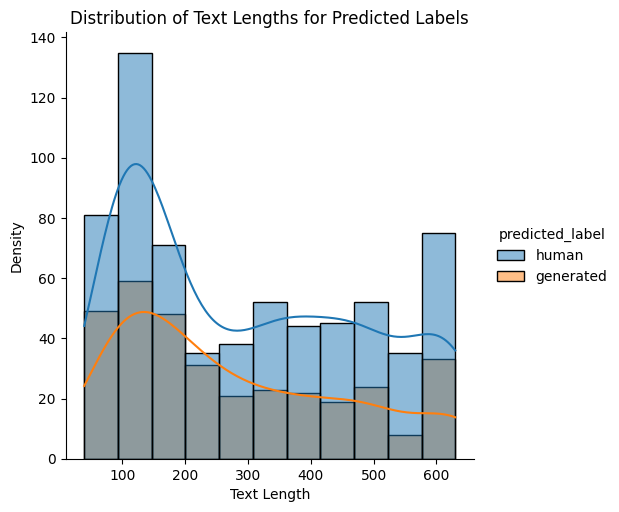

Accuracy for Different Text Length Ranges with GPT:
-----------------------------------------------------
Text Length Range 0-100: Accuracy = 35.76%
Text Length Range 101-500: Accuracy = 34.67%
Text Length Range 501+: Accuracy = 28.25%


In [15]:
df3 = pd.read_csv("classification_results_gpt_gpt.csv")
df3.rename(columns={'generated_label': 'predicted_label'}, inplace=True)

# Assuming you have a function clean_generated_text defined
df3['predicted_label'] = df3['predicted_label'].apply(clean_generated_text)

df3['text_length'] = df3['text'].apply(len)

# Plot the distribution of text lengths for each label (human/generated)
sns.displot(data=df3, x='text_length', hue='predicted_label', kde=True)
plt.title('Distribution of Text Lengths for Predicted Labels')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.show()

# ranges
short_range = (0, 100)
medium_range = (101, 500)
long_range = (501, float('inf'))

# Calculate accuracy for texts in the short range (0-100 characters)
short_texts = df3[(df3['text_length'] >= short_range[0]) & (df3['text_length'] <= short_range[1])]
short_accuracy = (short_texts['label'] == short_texts['predicted_label']).mean()

# Calculate accuracy for texts in the medium range (101-400 characters)
medium_texts = df3[(df3['text_length'] >= medium_range[0]) & (df3['text_length'] <= medium_range[1])]
medium_accuracy = (medium_texts['label'] == medium_texts['predicted_label']).mean()

# Calculate accuracy for texts in the long range (401+ characters)
long_texts = df3[df3['text_length'] >= long_range[0]]
long_accuracy = (long_texts['label'] == long_texts['predicted_label']).mean()

print("Accuracy for Different Text Length Ranges with GPT:")
print("-----------------------------------------------------")
print(f"Text Length Range 0-100: Accuracy = {short_accuracy:.2%}")
print(f"Text Length Range 101-500: Accuracy = {medium_accuracy:.2%}")
print(f"Text Length Range 501+: Accuracy = {long_accuracy:.2%}")

## GPT accuracy across domains

In [ ]:
# Calculate accuracy and average text length for 'tweets' domain
tweets_df = df_gpt[df_gpt['domain'] == 'tweets']
tweets_accuracy = (tweets_df['label'] == tweets_df['predicted_label']).mean()
tweets_avg_length = tweets_df['text_length'].mean()

# Calculate accuracy and average text length for 'legal' domain
legal_df = df_gpt[df_gpt['domain'] == 'legal']
legal_accuracy = (legal_df['label'] == legal_df['predicted_label']).mean()
legal_avg_length = legal_df['text_length'].mean()

# Calculate accuracy and average text length for 'wiki' domain
wiki_df = df_gpt[df_gpt['domain'] == 'wiki']
wiki_accuracy = (wiki_df['label'] == wiki_df['predicted_label']).mean()
wiki_avg_length = wiki_df['text_length'].mean()

print("Accuracy and Average Text Length for Different Domains:")
print(f"Tweets: Accuracy={tweets_accuracy:.2%}, Average Length={tweets_avg_length:.2f}")
print(f"Legal: Accuracy={legal_accuracy:.2%}, Average Length={legal_avg_length:.2f}")
print(f"Wiki: Accuracy={wiki_accuracy:.2%}, Average Length={wiki_avg_length:.2f}")


Accuracy and Average Text Length for Different Domains:
Tweets: Accuracy=51.58%, Average Length=108.09
Legal: Accuracy=54.94%, Average Length=417.28
Wiki: Accuracy=52.58%, Average Length=431.56
